# AIMedic - Homework 3

Name: `Mahsa Amani`

Email: `mahsa.ama1391@gmail.com`

---
Mobina Pournemat and I thought about the exercise to learn more, and did it together.

## Import requirements for load and visualization

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
from tensorflow.image import adjust_brightness
from skimage.transform import rotate
import cv2

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Load data

In [3]:
!wget -O Data.npz https://zenodo.org/record/4269852/files/dermamnist.npz?download=1

--2021-08-16 17:45:27--  https://zenodo.org/record/4269852/files/dermamnist.npz?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19725078 (19M) [application/octet-stream]
Saving to: ‘Data.npz’

Data.npz            100%[===================>]  18.81M  6.21MB/s    in 3.0s    

2021-08-16 17:45:31 (6.21 MB/s) - ‘Data.npz’ saved [19725078/19725078]



In [4]:
data = np.load('Data.npz')
print(data.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [5]:
X_train, y_train = data['train_images'], data['train_labels']
X_val, y_val = data['val_images'], data['val_labels']
X_test, y_test = data['test_images'], data['test_labels']

## Preprocessing

In [6]:
print(f'Shape of training data is {X_train.shape} and shape of their labels is {y_train.shape}')
print(f'Shape of validation data is {X_val.shape} and shape of their labels is {y_val.shape}')
print(f'Shape of test data is {X_test.shape} and shape of their labels is {y_test.shape}')  

Shape of training data is (7007, 28, 28, 3) and shape of their labels is (7007, 1)
Shape of validation data is (1003, 28, 28, 3) and shape of their labels is (1003, 1)
Shape of test data is (2005, 28, 28, 3) and shape of their labels is (2005, 1)


### Data reshape

In [7]:
y_train = y_train.reshape(-1,)
y_val = y_val.reshape(-1,)
y_test = y_test.reshape(-1,)

In [8]:
print(f'Shape of training data is {X_train.shape} and shape of their labels is {y_train.shape}')
print(f'Shape of validation data is {X_val.shape} and shape of their labels is {y_val.shape}')
print(f'Shape of test data is {X_test.shape} and shape of their labels is {y_test.shape}')  

Shape of training data is (7007, 28, 28, 3) and shape of their labels is (7007,)
Shape of validation data is (1003, 28, 28, 3) and shape of their labels is (1003,)
Shape of test data is (2005, 28, 28, 3) and shape of their labels is (2005,)


### Visualize data

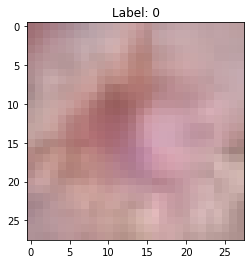

In [9]:
i = 0
plt.title("Label: " + str(y_train[i]))
plt.imshow(X_train[i])

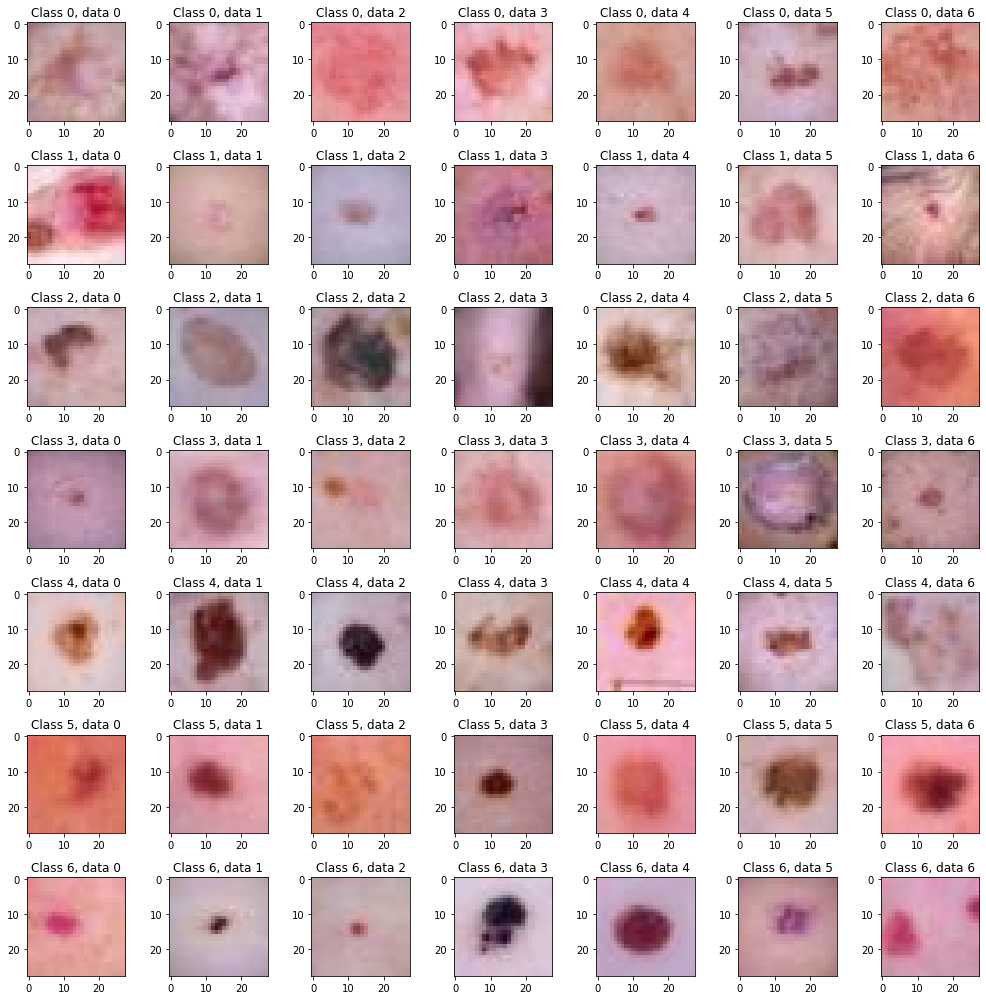

In [10]:
no_classes = len(np.unique(y_train))
fig, axes = plt.subplots(7, 7, figsize=(14, 14))
for c in range(no_classes):
    indexes = np.where(y_train == c)[0][:no_classes]
    class_images = [X_train[i] for i in indexes]
    for i in range(no_classes):
        t = f'Class {c}, data {i}'
        axes[c, i].set_title(t)
        axes[c, i].imshow(class_images[i])
plt.tight_layout()

### Data distribution

In [11]:
def get_distribution(inp):
    dist = [0 for i in range(no_classes)]
    for i in inp:
        dist[i] += 1
    return dist

In [12]:
print('Initial data distribution: ', get_distribution(y_train))

Initial data distribution:  [228, 359, 769, 80, 779, 4693, 99]


Data is imbalanced, so we can oversample and undersample. 

### Undersample and Oversample

In [64]:
# undersample class with more data

count = 1
i = 0
X_augmented = X_train
y_augmented = y_train
indexes = []
while count <= 3000:
    if y_train[i] == 5:
        indexes.append(i)
        count += 1
    i += 1

X_augmented = np.delete(X_augmented, indexes, axis=0)
y_augmented = np.delete(y_augmented, indexes, axis=0)

In [65]:
# oversample classes with less data
# new data by flipping, rotating, and adjusting brightness

for i in range(X_train.shape[0]):
    y = y_train[i]
    if y == 0:
        # flip
        X_augmented = np.append(X_augmented, [X_train[i][:, ::-1,:], X_train[i][::-1, :,:]], axis=0)
        # brightness adjustment
        X_augmented = np.append(X_augmented, [adjust_brightness(X_train[i], delta=0.3), adjust_brightness(X_train[1], delta=-0.3)], axis=0)
        # rotation
        X_augmented = np.append(X_augmented, [rotate(X_train[i], 45), rotate(X_train[i], 90)], axis=0)
        # 
        y_augmented = np.append(y_augmented, [y, y, y, y, y, y], axis=0)
    elif y == 1:
        X_augmented = np.append(X_augmented, [X_train[i][:, ::-1,:]], axis=0)
        X_augmented = np.append(X_augmented, [adjust_brightness(X_train[i], delta=0.3)], axis=0)
        X_augmented = np.append(X_augmented, [rotate(X_train[i], 45)], axis=0)
        y_augmented = np.append(y_augmented, [y ,y, y], axis=0)
    elif y == 2:
        X_augmented = np.append(X_augmented, [adjust_brightness(X_train[i], delta=0.3)], axis=0)
        y_augmented = np.append(y_augmented, [y], axis=0)
    elif y == 3:
        X_augmented = np.append(X_augmented, [X_train[i][:, ::-1,:], X_train[i][::-1, :,:]], axis=0)
        X_augmented = np.append(X_augmented, [adjust_brightness(X_train[i], delta=-0.6), adjust_brightness(X_train[i], delta=0.3), adjust_brightness(X_train[i], delta=0.6), adjust_brightness(X_train[1], delta=-0.3)], axis=0)
        X_augmented = np.append(X_augmented, [rotate(X_train[i], 45), rotate(X_train[i], 90), rotate(X_train[i], 135)], axis=0)
        y_augmented = np.append(y_augmented, [y, y, y, y, y, y, y, y, y], axis=0)
    elif y == 4:
        X_augmented = np.append(X_augmented, [adjust_brightness(X_train[i], delta=0.3)], axis=0)
        y_augmented = np.append(y_augmented, [y], axis=0)
    elif y == 5:
        continue
    elif y == 6:
        X_augmented = np.append(X_augmented, [X_train[i][:, ::-1,:], X_train[i][::-1, :,:]], axis=0)
        X_augmented = np.append(X_augmented, [adjust_brightness(X_train[i], delta=0.3), adjust_brightness(X_train[1], delta=-0.3), adjust_brightness(X_train[i], delta=-0.6), adjust_brightness(X_train[i], delta=0.6)], axis=0)
        X_augmented = np.append(X_augmented, [rotate(X_train[i], 45), rotate(X_train[i], 90), rotate(X_train[i], 135)], axis=0)
        y_augmented = np.append(y_augmented, [y, y, y, y, y, y, y, y, y], axis=0)

In [69]:
def unison_shuffle(a, b):
    inx = np.random.permutation(a.shape[0])
    return a[inx], b[inx]

X_augmented, y_augmented = unison_shuffle(X_augmented, y_augmented)

In [70]:
get_distribution(y_augmented)

[1596, 1436, 1538, 800, 1558, 1693, 990]

In [71]:
X_augmented.shape, y_augmented.shape

((9611, 28, 28, 3), (9611,))

By augmenting data, results get worse and it is pointless. So, only the rest of this part has done for preprocessing. Also, because our data is imbalanced, we should use preformance metrics like `precision` and `recall`, instead of only using `loss` and `accuracy`.

### Resize data

Because it is better to have images that their dimension is a power of 2, and by resizing to 16, images become too unclear and results get worse. By trying 32 for resize, results get better.

In [13]:
new_width = 32
new_height = 32
X_train = np.array([cv2.resize(img, (new_height, new_width)) for img in X_train])
X_test  = np.array([cv2.resize(img, (new_height, new_width)) for img in X_test])
X_val  = np.array([cv2.resize(img, (new_height, new_width)) for img in X_val])

In [14]:
print(f'Shape of training data is {X_train.shape} and shape of their labels is {y_train.shape}')
print(f'Shape of validation data is {X_val.shape} and shape of their labels is {y_val.shape}')
print(f'Shape of test data is {X_test.shape} and shape of their labels is {y_test.shape}')  

Shape of training data is (7007, 32, 32, 3) and shape of their labels is (7007,)
Shape of validation data is (1003, 32, 32, 3) and shape of their labels is (1003,)
Shape of test data is (2005, 32, 32, 3) and shape of their labels is (2005,)


### Data Normalization

By normalizing data, we can scale and minimize it and save memory.

In [15]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

### One-hot encoding

In [16]:
Y_train = to_categorical(y_train)
Y_val = to_categorical(y_val)
Y_test = to_categorical(y_test)

In [17]:
print(f'Shape of training data is {X_train.shape} and shape of their labels is {Y_train.shape}')
print(f'Shape of validation data is {X_val.shape} and shape of their labels is {Y_val.shape}')
print(f'Shape of test data is {X_test.shape} and shape of their labels is {Y_test.shape}')  

Shape of training data is (7007, 32, 32, 3) and shape of their labels is (7007, 7)
Shape of validation data is (1003, 32, 32, 3) and shape of their labels is (1003, 7)
Shape of test data is (2005, 32, 32, 3) and shape of their labels is (2005, 7)


## Import requirements for defining parameters and training

In [31]:
from keras.models import Sequential
from keras import Input, Model
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.regularizers import l2, l1
from keras.layers.merge import concatenate
import tensorflow as tf

## Model Architecture

Without data preprocessing(normalization and resize) precesion and recall are less(less than 0.6) than now(with preprocessing). 

### Sequential API model

I tried differnet filter sizes, activation functions, strides and number of layers and chose the best ones with better results. I also tried l1 regularization to avoid fluctuations in plots, but because results got worse I removed it. From those fluctuations I realized that learning rate is high so I changed it. Finally after all these, I used drop out and l2 regularization to avoid overfitting.

In [99]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(3,3), activation='elu', padding='same', input_shape= (32,32,3), kernel_regularizer=l2(0.001)),
        Conv2D(filters=32, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),         
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),
        Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),          
        MaxPooling2D((2,2)),
        Dropout(0.2),

        Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
        Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
        Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),       
        MaxPooling2D((2,2)),
        Dropout(0.2),
        
        Flatten(),
        Dense(50, 'elu'),
        Dense(7, 'softmax')
])

In [101]:
# plot_model(model, show_shapes=True)

In [37]:
model.compile(optimizer=Adam(0.00005), loss='categorical_crossentropy', metrics=['acc', Precision(), Recall()])

In [38]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=60, validation_data=(X_val, Y_val))

Epoch 1/60
219/219 [==============================] - 48s 15ms/step - loss: 1.6554 - acc: 0.6606 - precision: 0.6397 - recall: 0.4805 - val_loss: 1.5265 - val_acc: 0.6590 - val_precision: 0.6903 - val_recall: 0.5848
Epoch 2/60
219/219 [==============================] - 2s 9ms/step - loss: 1.5212 - acc: 0.6680 - precision: 0.6976 - recall: 0.5770 - val_loss: 1.4301 - val_acc: 0.6800 - val_precision: 0.7173 - val_recall: 0.5727
Epoch 3/60
219/219 [==============================] - 2s 9ms/step - loss: 1.4243 - acc: 0.6737 - precision: 0.7251 - recall: 0.5723 - val_loss: 1.3965 - val_acc: 0.6760 - val_precision: 0.7401 - val_recall: 0.5726
Epoch 4/60
219/219 [==============================] - 2s 9ms/step - loss: 1.4016 - acc: 0.6699 - precision: 0.7444 - recall: 0.5727 - val_loss: 1.3573 - val_acc: 0.6919 - val_precision: 0.7550 - val_recall: 0.5741
Epoch 5/60
219/219 [==============================] - 2s 9ms/step - loss: 1.3380 - acc: 0.6845 - precision: 0.7586 - recall: 0.5744 - val_loss

In [42]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 6ms/step - loss: 0.9062 - acc: 0.7596 - precision: 0.8228 - recall: 0.6669


[0.9062243103981018,
 0.7596009969711304,
 0.8228156566619873,
 0.6669345498085022]

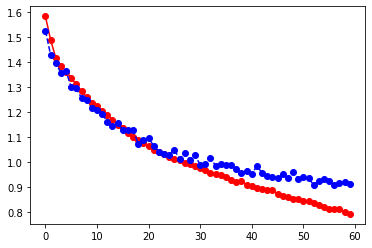

In [39]:
plt.plot(history.history['loss'], 'r-o')
plt.plot(history.history['val_loss'], 'b--o')

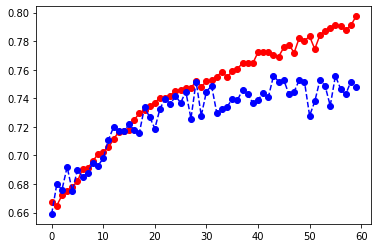

In [40]:
plt.plot(history.history['acc'], 'r-o')
plt.plot(history.history['val_acc'], 'b--o')

In [41]:
y_true = data['test_labels'].reshape(-1,)
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.27      0.39        66
           1       0.50      0.56      0.53       103
           2       0.57      0.43      0.49       220
           3       0.38      0.22      0.28        23
           4       0.53      0.31      0.39       223
           5       0.82      0.94      0.88      1341
           6       0.75      0.62      0.68        29

    accuracy                           0.76      2005
   macro avg       0.61      0.48      0.52      2005
weighted avg       0.74      0.76      0.74      2005



### Functional API model

The results of this model, due to its flexibility, are much better than sequential model.

In [89]:
inputs = Input(shape=(32,32,3))
conv_1 = Conv2D(32, (3, 3), activation='elu')(inputs)
conv_2 = Conv2D(32, (3, 3), activation='elu')(conv_1)
maxpool_1 = MaxPooling2D((2, 2))(conv_1)

conv_3 = Conv2D(64, (3, 3), activation='elu')(maxpool_1)
maxpool_2 = MaxPooling2D((2, 2))(conv_3)
flat1 = Flatten()(maxpool_2)

conv_4 = Conv2D(64, (3, 3), activation='elu')(maxpool_1)
maxpool_3 = MaxPooling2D((2, 2))(conv_4)
flat2 = Flatten()(maxpool_3)

merge = concatenate([flat1, flat2])

hidden1 = Dense(50, 'elu')(merge)
output = Dense(7, 'softmax')(hidden1)

fmodel = Model(inputs=inputs, outputs=output)

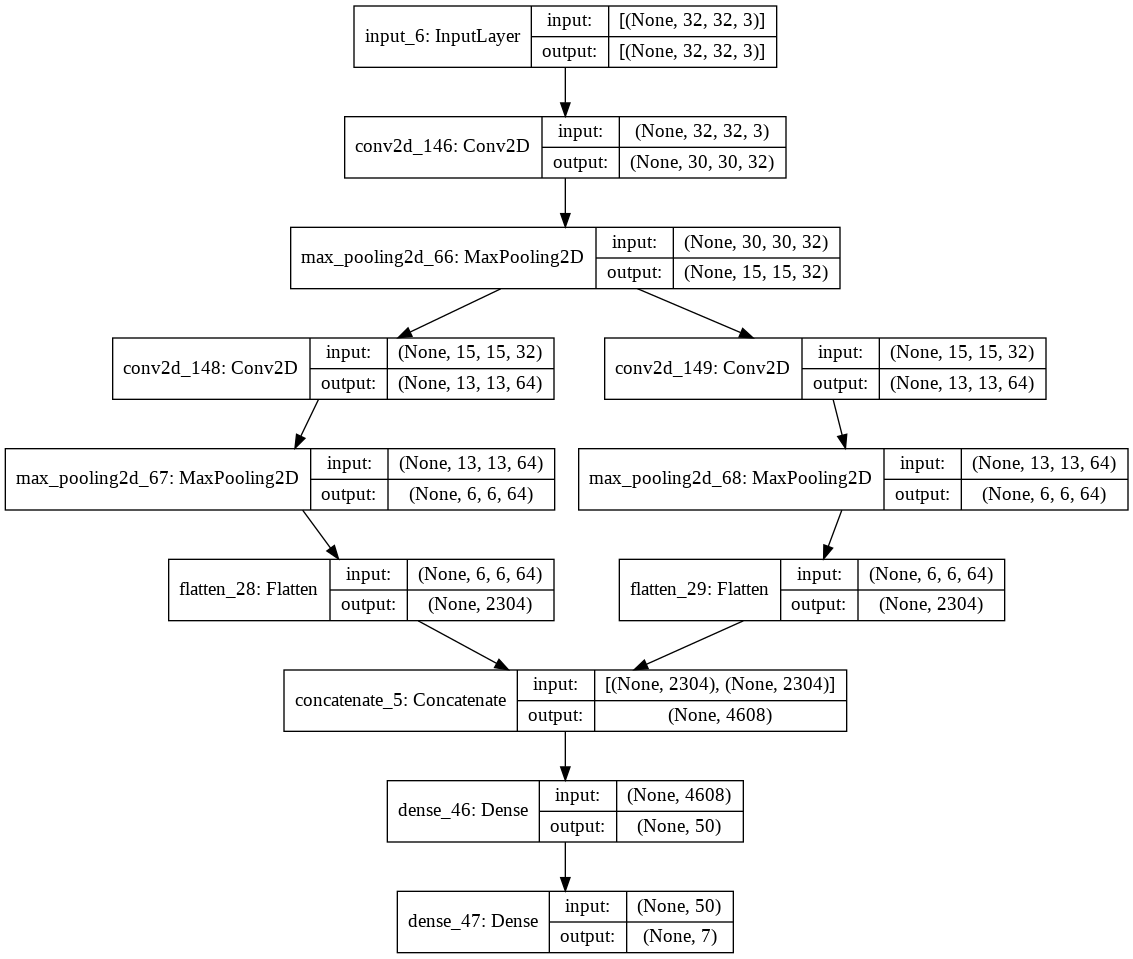

In [90]:
plot_model(fmodel, show_shapes=True)

In [93]:
fmodel.compile(optimizer=Adam(0.00005), loss='categorical_crossentropy', metrics=['acc', Precision(), Recall()])

In [94]:
fmodel.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))

Epoch 1/30
219/219 [==============================] - 3s 9ms/step - loss: 1.0447 - acc: 0.6603 - precision_25: 0.7178 - recall_25: 0.5813 - val_loss: 1.0060 - val_acc: 0.6620 - val_precision_25: 0.7392 - val_recall_25: 0.5848
Epoch 2/30
219/219 [==============================] - 1s 6ms/step - loss: 0.9752 - acc: 0.6730 - precision_25: 0.7434 - recall_25: 0.5837 - val_loss: 0.9590 - val_acc: 0.6740 - val_precision_25: 0.7516 - val_recall_25: 0.5823
Epoch 3/30
219/219 [==============================] - 1s 6ms/step - loss: 0.9650 - acc: 0.6660 - precision_25: 0.7521 - recall_25: 0.5825 - val_loss: 0.9451 - val_acc: 0.6790 - val_precision_25: 0.7568 - val_recall_25: 0.5845
Epoch 4/30
219/219 [==============================] - 1s 6ms/step - loss: 0.9341 - acc: 0.6772 - precision_25: 0.7579 - recall_25: 0.5852 - val_loss: 0.9485 - val_acc: 0.6780 - val_precision_25: 0.7621 - val_recall_25: 0.5827
Epoch 5/30
219/219 [==============================] - 1s 6ms/step - loss: 0.9313 - acc: 0.6770 -

In [95]:
fmodel.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.7719 - acc: 0.7147 - precision_25: 0.8037 - recall_25: 0.5937


[0.7718528509140015,
 0.7147132158279419,
 0.8036693930625916,
 0.5936611890792847]

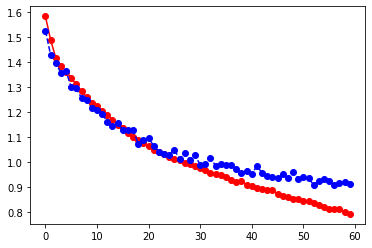

In [96]:
plt.plot(history.history['loss'], 'r-o')
plt.plot(history.history['val_loss'], 'b--o')

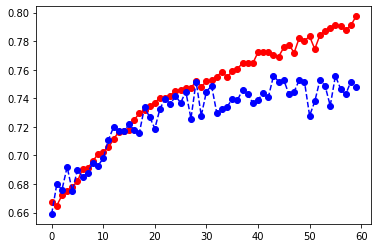

In [97]:
plt.plot(history.history['acc'], 'r-o')
plt.plot(history.history['val_acc'], 'b--o')

In [98]:
y_pred = fmodel.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print(classification_report(y_true, y_pred_classes))

              precision    recall  f1-score   support

           0       0.31      0.08      0.12        66
           1       0.34      0.59      0.43       103
           2       0.51      0.30      0.37       220
           3       0.00      0.00      0.00        23
           4       0.48      0.23      0.31       223
           5       0.80      0.93      0.86      1341
           6       0.43      0.10      0.17        29

    accuracy                           0.71      2005
   macro avg       0.41      0.32      0.32      2005
weighted avg       0.68      0.71      0.68      2005



## Parameters

### Activation function

In [83]:
activation_functions = ['relu', 'sigmoid', 'tanh', 'elu', 'selu']

for f in activation_functions:
    cnn = Sequential([
            Conv2D(filters=32, kernel_size=(3,3), activation=f, padding='same', input_shape= (32,32,3), kernel_regularizer=l2(0.001)),
            Conv2D(filters=32, kernel_size=(3,3), activation=f, padding='same', kernel_regularizer=l2(0.001)),         
            MaxPooling2D((2,2)),
            Dropout(0.2),
            Conv2D(filters=64, kernel_size=(3,3), activation=f, padding='same', kernel_regularizer=l2(0.001)),
            Conv2D(filters=64, kernel_size=(3,3), activation=f, padding='same', kernel_regularizer=l2(0.001)),          
            MaxPooling2D((2,2)),
            Dropout(0.2),
            Conv2D(filters=128, kernel_size=(3,3), activation=f, padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=128, kernel_size=(3,3), activation=f, padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=128, kernel_size=(3,3), activation=f, padding='same', kernel_regularizer=l2(0.001)),       
            MaxPooling2D((2,2)),
            Dropout(0.2),
            Flatten(),
            Dense(50, activation=f),
            Dense(7, 'softmax')
    ])

    cnn.compile(optimizer=Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
    cnn.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))
    print('Evaluating ...')
    print('---------------------', f, '------------------------')
    cnn.evaluate(X_test, Y_test)
    print()

Epoch 1/30
219/219 [==============================] - 5s 13ms/step - loss: 1.9113 - accuracy: 0.6047 - precision_7: 0.3910 - recall_7: 0.1951 - val_loss: 1.5312 - val_accuracy: 0.6690 - val_precision_7: 0.6739 - val_recall_7: 0.5509
Epoch 2/30
219/219 [==============================] - 2s 9ms/step - loss: 1.4614 - accuracy: 0.6676 - precision_7: 0.6801 - recall_7: 0.5577 - val_loss: 1.4097 - val_accuracy: 0.6690 - val_precision_7: 0.7019 - val_recall_7: 0.5567
Epoch 3/30
219/219 [==============================] - 2s 9ms/step - loss: 1.3329 - accuracy: 0.6777 - precision_7: 0.7099 - recall_7: 0.5530 - val_loss: 1.3719 - val_accuracy: 0.6690 - val_precision_7: 0.7267 - val_recall_7: 0.5472
Epoch 4/30
219/219 [==============================] - 2s 9ms/step - loss: 1.2828 - accuracy: 0.6684 - precision_7: 0.7332 - recall_7: 0.5443 - val_loss: 1.2764 - val_accuracy: 0.6690 - val_precision_7: 0.7450 - val_recall_7: 0.5452
Epoch 5/30
219/219 [==============================] - 2s 9ms/step - los

It is obvious that `elu` and `selu` are better than the others.

### Filter size

In [84]:
filter_size = [[8, 16, 32], [16, 32, 64], [64, 128, 256], [30, 60, 120]]

for f in filter_size:
    cnn = Sequential([
            Conv2D(filters=f[0], kernel_size=(3,3), activation='elu', padding='same', input_shape= (32,32,3), kernel_regularizer=l2(0.001)),
            Conv2D(filters=f[0], kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),         
            MaxPooling2D((2,2)),
            Dropout(0.2),
            Conv2D(filters=f[1], kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),
            Conv2D(filters=f[1], kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),          
            MaxPooling2D((2,2)),
            Dropout(0.2),
            Conv2D(filters=f[2], kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=f[2], kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=f[2], kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),       
            MaxPooling2D((2,2)),
            Dropout(0.2),
            Flatten(),
            Dense(50, activation='elu'),
            Dense(7, 'softmax')
    ])

    cnn.compile(optimizer=Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
    cnn.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))
    print('Evaluating ...')
    print('---------------------', f, '------------------------')
    cnn.evaluate(X_test, Y_test)
    print()


Epoch 1/30
219/219 [==============================] - 4s 11ms/step - loss: 1.4876 - accuracy: 0.5662 - precision_12: 0.5077 - recall_12: 0.2489 - val_loss: 1.2592 - val_accuracy: 0.6690 - val_precision_12: 0.6677 - val_recall_12: 0.5812
Epoch 2/30
219/219 [==============================] - 2s 7ms/step - loss: 1.2625 - accuracy: 0.6718 - precision_12: 0.6678 - recall_12: 0.5976 - val_loss: 1.2378 - val_accuracy: 0.6690 - val_precision_12: 0.6702 - val_recall_12: 0.6209
Epoch 3/30
219/219 [==============================] - 2s 7ms/step - loss: 1.2109 - accuracy: 0.6672 - precision_12: 0.6714 - recall_12: 0.6207 - val_loss: 1.2539 - val_accuracy: 0.6690 - val_precision_12: 0.6779 - val_recall_12: 0.6105
Epoch 4/30
219/219 [==============================] - 2s 8ms/step - loss: 1.1705 - accuracy: 0.6684 - precision_12: 0.6802 - recall_12: 0.6082 - val_loss: 1.1749 - val_accuracy: 0.6680 - val_precision_12: 0.6856 - val_recall_12: 0.5978
Epoch 5/30
219/219 [==============================] - 2

`[64, 128, 256]` has better results.

### Kernel size in MaxPooling

In [85]:
kernel_size = [(2, 2), (3, 3)]

for k in kernel_size:
    cnn = Sequential([
            Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', input_shape= (32,32,3), kernel_regularizer=l2(0.001)),
            Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),         
            MaxPooling2D(k),
            Dropout(0.2),
            Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),
            Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),          
            MaxPooling2D(k),
            Dropout(0.2),
            Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),       
            MaxPooling2D(k),
            Dropout(0.2),
            Flatten(),
            Dense(50, activation='elu'),
            Dense(7, 'softmax')
    ])

    cnn.compile(optimizer=Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
    cnn.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))
    print('Evaluating ...')
    print('--------------------- Kernel size: ', k, '------------------------')
    cnn.evaluate(X_test, Y_test)
    print()

Epoch 1/30
219/219 [==============================] - 6s 20ms/step - loss: 2.1086 - accuracy: 0.6633 - precision_16: 0.6542 - recall_16: 0.4967 - val_loss: 1.9623 - val_accuracy: 0.6750 - val_precision_16: 0.7190 - val_recall_16: 0.5606
Epoch 2/30
219/219 [==============================] - 4s 17ms/step - loss: 1.8883 - accuracy: 0.6761 - precision_16: 0.7349 - recall_16: 0.5557 - val_loss: 1.8384 - val_accuracy: 0.6710 - val_precision_16: 0.7572 - val_recall_16: 0.5623
Epoch 3/30
219/219 [==============================] - 4s 17ms/step - loss: 1.8027 - accuracy: 0.6790 - precision_16: 0.7630 - recall_16: 0.5630 - val_loss: 1.7673 - val_accuracy: 0.6869 - val_precision_16: 0.7733 - val_recall_16: 0.5672
Epoch 4/30
219/219 [==============================] - 4s 17ms/step - loss: 1.7699 - accuracy: 0.6859 - precision_16: 0.7752 - recall_16: 0.5690 - val_loss: 1.7188 - val_accuracy: 0.6770 - val_precision_16: 0.7821 - val_recall_16: 0.5714
Epoch 5/30
219/219 [==============================] 

`kernel size = (2, 2)` has better results.

### Stride

In [87]:
strides = [(1, 1), (2, 2), (3, 3), (4, 4)]

for s in strides:
    cnn = Sequential([
            Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', input_shape= (32,32,3), kernel_regularizer=l2(0.001)),
            Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),         
            MaxPooling2D((2,2), strides=s),
            Dropout(0.2),
            Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),
            Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),          
            MaxPooling2D((2,2), strides=s),
            Dropout(0.2),
            Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
            Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),       
            MaxPooling2D((2,2), strides=s),
            Dropout(0.2),
            Flatten(),
            Dense(50, activation='elu'),
            Dense(7, 'softmax')
    ])

    cnn.compile(optimizer=Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
    cnn.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))
    print('Evaluating ...')
    print('--------------------- Strides: ', s, '------------------------')
    cnn.evaluate(X_test, Y_test)
    print()


Epoch 1/30
219/219 [==============================] - 18s 75ms/step - loss: 2.1543 - accuracy: 0.6282 - precision_19: 0.6857 - recall_19: 0.4801 - val_loss: 2.1534 - val_accuracy: 0.6241 - val_precision_19: 0.7659 - val_recall_19: 0.5448
Epoch 2/30
219/219 [==============================] - 16s 71ms/step - loss: 1.8365 - accuracy: 0.6876 - precision_19: 0.7749 - recall_19: 0.5372 - val_loss: 1.9736 - val_accuracy: 0.6181 - val_precision_19: 0.7867 - val_recall_19: 0.5482
Epoch 3/30
219/219 [==============================] - 16s 72ms/step - loss: 1.7600 - accuracy: 0.6997 - precision_19: 0.7903 - recall_19: 0.5499 - val_loss: 1.9676 - val_accuracy: 0.6301 - val_precision_19: 0.7950 - val_recall_19: 0.5592
Epoch 4/30
219/219 [==============================] - 16s 72ms/step - loss: 1.7023 - accuracy: 0.7165 - precision_19: 0.7962 - recall_19: 0.5605 - val_loss: 1.7806 - val_accuracy: 0.6810 - val_precision_19: 0.7987 - val_recall_19: 0.5699
Epoch 5/30
219/219 [============================

Stride `(3, 3)` has better results.

### AveragePooling

In [88]:
cnn = Sequential([
        Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', input_shape= (32,32,3), kernel_regularizer=l2(0.001)),
        Conv2D(filters=64, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),         
        AveragePooling2D((2,2), strides=(3, 3)),
        Dropout(0.2),
        Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),
        Conv2D(filters=128, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),          
        AveragePooling2D((2,2), strides=(3, 3)),
        Dropout(0.2),
        Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
        Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)), 
        Conv2D(filters=256, kernel_size=(3,3), activation='elu', padding='same', kernel_regularizer=l2(0.001)),       
        AveragePooling2D((2,2), strides=(3, 3)),
        Dropout(0.2),
        Flatten(),
        Dense(50, activation='elu'),
        Dense(7, 'softmax')
])

cnn.compile(optimizer=Adam(0.00005), loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
cnn.fit(X_train, Y_train, epochs=30, batch_size=32, validation_data=(X_val, Y_val))
cnn.evaluate(X_test, Y_test)

Epoch 1/30
219/219 [==============================] - 6s 18ms/step - loss: 2.1719 - accuracy: 0.6499 - precision_23: 0.5830 - recall_23: 0.4200 - val_loss: 1.9615 - val_accuracy: 0.6650 - val_precision_23: 0.6922 - val_recall_23: 0.5633
Epoch 2/30
219/219 [==============================] - 3s 14ms/step - loss: 1.9323 - accuracy: 0.6648 - precision_23: 0.6982 - recall_23: 0.5601 - val_loss: 1.8277 - val_accuracy: 0.6680 - val_precision_23: 0.7114 - val_recall_23: 0.5612
Epoch 3/30
219/219 [==============================] - 3s 14ms/step - loss: 1.8257 - accuracy: 0.6664 - precision_23: 0.7158 - recall_23: 0.5635 - val_loss: 1.7523 - val_accuracy: 0.6720 - val_precision_23: 0.7299 - val_recall_23: 0.5652
Epoch 4/30
219/219 [==============================] - 3s 14ms/step - loss: 1.7480 - accuracy: 0.6722 - precision_23: 0.7341 - recall_23: 0.5655 - val_loss: 1.6856 - val_accuracy: 0.6720 - val_precision_23: 0.7428 - val_recall_23: 0.5659
Epoch 5/30
219/219 [==============================] 

[1.0152606964111328, 0.723192036151886, 0.8020400404930115, 0.59473717212677]

`MaxPooling` is doing better than `AveragePooling`.